---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [7]:
#이번 프로젝트에서 분석할 데이터를 불러오세요

seoul_bike = pd.read_csv('sbikedata.csv')
seoul_bike.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : 
    
    ㅇ 귀무가설: 온도와 따릉이 대여량 간에는 연관성이 없다.

    ㅇ 대립가설 : 온도와 따릉이 대여량 간에는 연관성이 있다.
    
- 가설 3 :

    ㅇ 귀무가설: 풍속과 따릉이 대여량 간에는 연관성이 없다.

    ㅇ 대립가설 : 풍속과 따릉이 대여량 간에는 연관성이 있다.

- 가설 4 :

    ㅇ 귀무가설: 시간별 따릉이 대여량은 차이가 없다.

    ㅇ 대립가설 : 시간별 따릉이 대여량은 차이가 있다.

- 가설 5 :

    ㅇ 귀무가설: 오존 농도와 따릉이 대여량 간에는 연관성이 없다.

    ㅇ 대립가설 : 오존 농도와 따릉이 대여량 간에는 연관성이 있다.

- 가설 6 :

    ㅇ 귀무가설: 미세먼지 농도와 따릉이 대여량 간에는 연관성이 없다

    ㅇ 대립가설 : 미세먼지 농도와 따릉이 대여량 간에는 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지


In [4]:
#변수의 자료형을 확인해보세요.
seoul_bike['hour'].dtypes

dtype('int64')

 - hour는 날짜별 시각을 나타내며 int형이다., 범주형이다.

3. 변수의 결측치 존재 여부 및 조치방안

In [8]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
seoul_bike['hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


 - 결측지가 존재하지 않는다.

4. 변수의 기초 통계량 확인

In [13]:
#변수의 기초 통계량을 확인해보세요.
seoul_bike['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

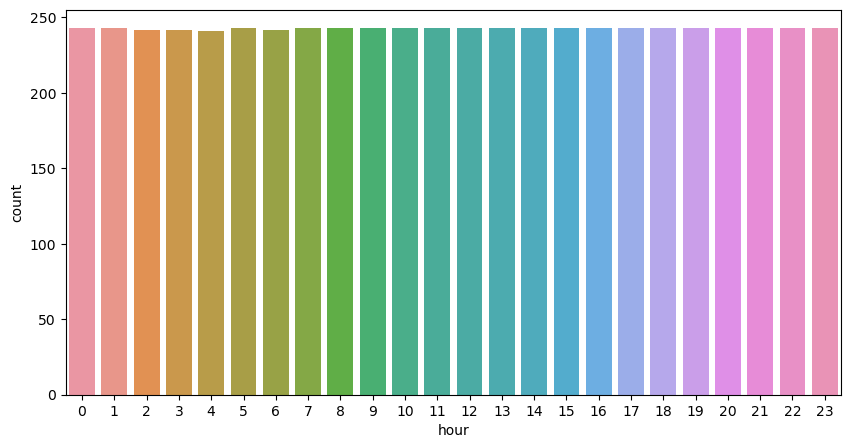

In [130]:
#변수의 분포를 확인해보세요.
plt.figure(figsize = (10,5))
#sns.barplot(x = 'hour', y = 'count', data = seoul_bike)
sns.countplot(x= 'hour', data = seoul_bike)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [5]:
#위 정보로부터 파악하신 내용을 정리해보세요.

 - 18시에 사용량이 가장 많다.
 - 새벽 시간대에 이용량이 매우 적고 아침 시간 대에 대여량이 증가하는 것을 볼 수 있다.

7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

In [238]:
seoul_bike['ozone'].value_counts()

0.002    177
0.031    170
0.034    162
0.029    161
0.032    160
        ... 
0.115      1
0.099      1
0.116      1
0.110      1
0.106      1
Name: ozone, Length: 110, dtype: int64

 - 요일 분석

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

  o 각 날짜별 시간당 평균 온도

2. 변수가 수치형인지 범주형인지


In [23]:
#변수의 자료형을 확인해보세요.
seoul_bike['temperature'].dtypes

dtype('float64')

  - 수치형이다.

3. 변수의 결측치 존재 여부 및 조치방안

In [24]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
seoul_bike['temperature'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


 - 결측치 없다.

4. 변수의 기초 통계량 확인

In [25]:
#변수의 기초 통계량을 확인해보세요
seoul_bike['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

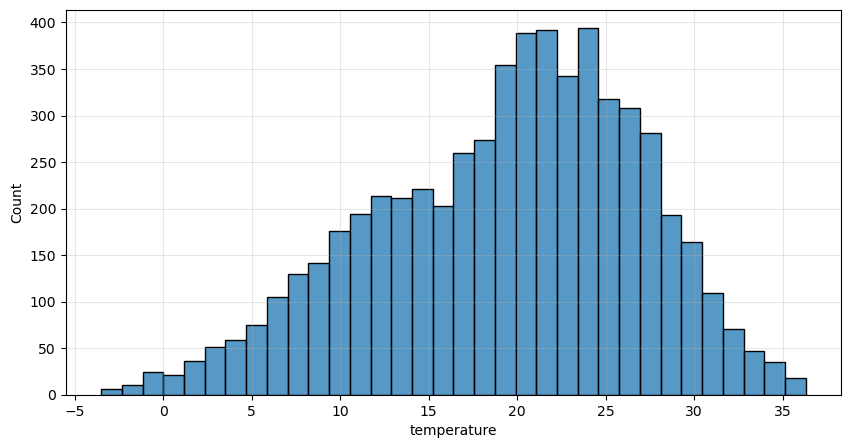

In [237]:
#변수의 분포를 확인해보세요.
plt.figure(figsize = (10,5))
sns.histplot(seoul_bike['temperature'])
plt.grid(alpha = 0.3)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

 - 약 -3도  ~ 36도까지 분포하는 것을 확인할 수 있다.
 - 날씨가 춥거나 덥다고 느껴지는 온도의 변수량이 적다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

              - 강우 여부

2. 변수가 수치형인지 범주형인지


In [40]:
#변수의 자료형을 확인해보세요.
seoul_bike['precipitation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


 - 자료형은 int형이고 범주형 변수이다.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

 - 결측치가 없다.

4. 변수의 기초 통계량 확인

In [41]:
#변수의 기초 통계량을 확인해보세요
seoul_bike['precipitation'].describebe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

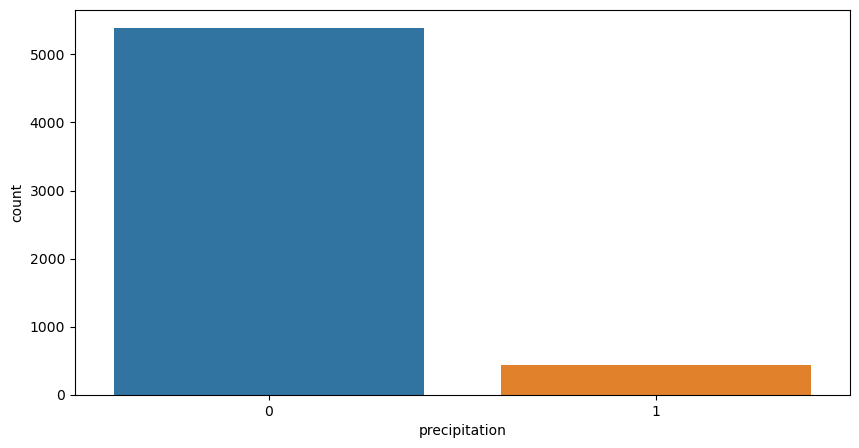

In [43]:
#변수의 분포를 확인해보세요.
plt.figure(figsize = (10,5))
sns.countplot(x = 'precipitation', data = seoul_bike)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

 - 비가 온 날이 현저히 작다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

각 날짜의 시간별 풍속

2. 변수가 수치형인지 범주형인지


In [53]:
#변수의 자료형을 확인해보세요.
seoul_bike['windspeed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


수치형 변수이다.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

결측지가 없다.

4. 변수의 기초 통계량 확인

In [54]:
#변수의 기초 통계량을 확인해보세요
seoul_bike['windspeed'].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

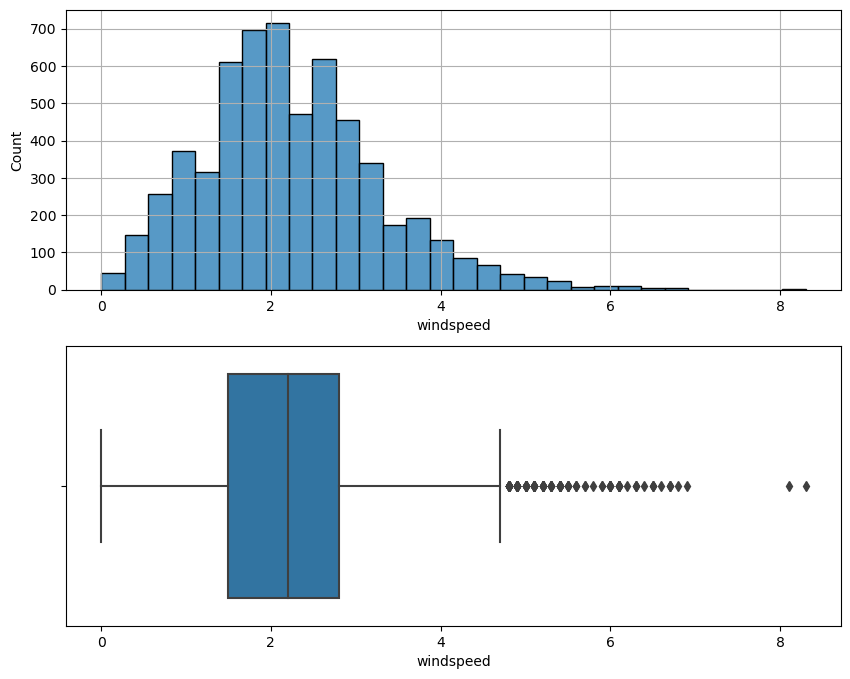

In [240]:
#변수의 분포를 확인해보세요.
plt.figure(figsize = (10,8))

plt.subplot(2,1,1)
sns.histplot(x = 'windspeed', data = seoul_bike, bins = 30)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = 'windspeed', data = seoul_bike)

plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 풍속의 차이가 심하다. 이상치가 많이 나타난다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

 - 이상치 원인(태풍 등)

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

 - 각 날짜의 시간별 평균 습도

2. 변수가 수치형인지 범주형인지


In [61]:
#변수의 자료형을 확인해보세요.
seoul_bike['humidity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


 - int형, 수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

 결측치 없다.

4. 변수의 기초 통계량 확인

In [62]:
#변수의 기초 통계량을 확인해보세요
seoul_bike['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

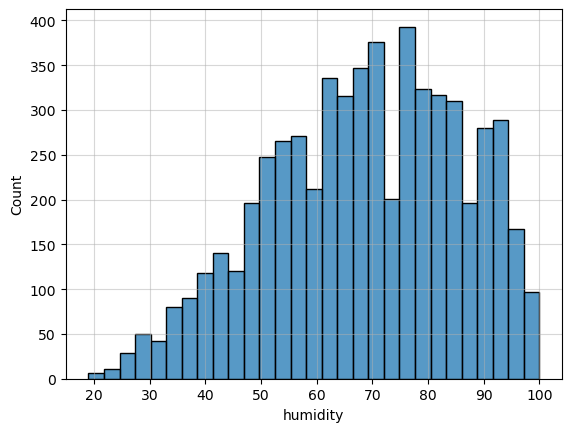

In [68]:
#변수의 분포를 확인해보세요.

sns.histplot(x = 'humidity', data = seoul_bike)
plt.grid(alpha=0.5)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

 - 주로 습도가 50 ~ 90

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

  - 온도에 따른 적정 습도 기준이 다르기 때문에 온도와 연관지을 필요가 있을 것 같다.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

 - 각 날짜의 시간별 가시거리

2. 변수가 수치형인지 범주형인지


In [69]:
#변수의 자료형을 확인해보세요.
seoul_bike['visibility'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


 수치형, float

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

결측치 없다.

4. 변수의 기초 통계량 확인

In [70]:
#변수의 기초 통계량을 확인해보세요
seoul_bike['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

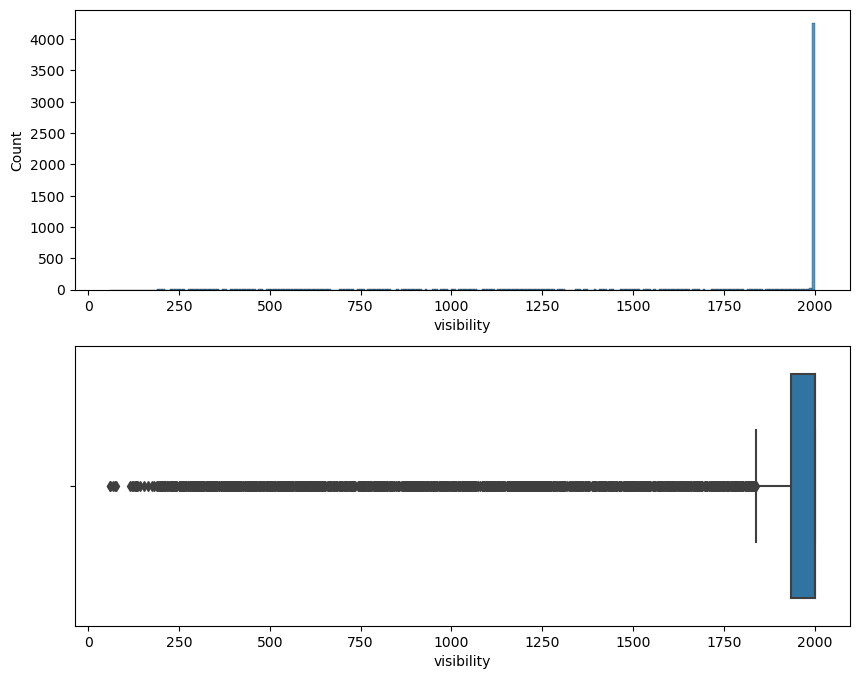

In [73]:
#변수의 분포를 확인해보세요.
plt.figure(figsize = (10,8))

plt.subplot(2,1,1)
sns.histplot(x = 'visibility', data = seoul_bike)

plt.subplot(2,1,2)
sns.boxplot(x = 'visibility', data = seoul_bike)

plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

 - 보통의 날씨는 2km의 시정을 나타내어 낮은 수치의 시정 분포가 많이 나타난다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

 - 낮은 수치의 시정값에 비해 2km의 변수량이 많아 나눠서 분석할 필요도 있을 것 같다.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

 - 각 날짜의 시간별 오존 농도

2. 변수가 수치형인지 범주형인지


In [74]:
#변수의 자료형을 확인해보세요.
seoul_bike['ozone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5699 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


수치형, float

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

결측치 있다. 결측지 0으로 변경

4. 변수의 기초 통계량 확인

In [75]:
#변수의 기초 통계량을 확인해보세요
seoul_bike['ozone'].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

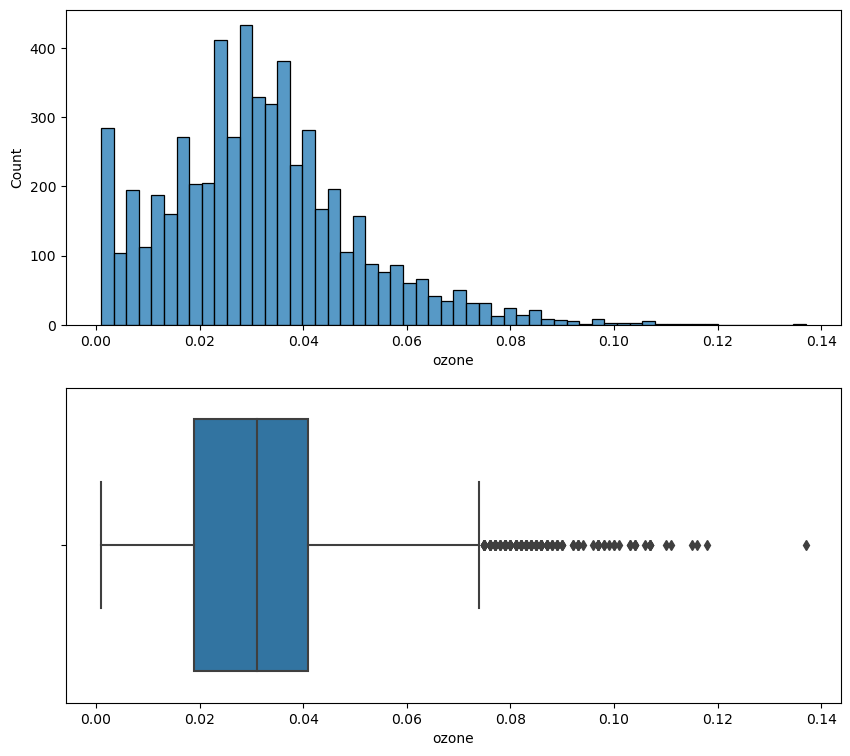

In [103]:
#변수의 분포를 확인해보세요.

plt.figure(figsize = (10,9))

plt.subplot(2,1,1)
sns.histplot(x = 'ozone', data = seoul_bike)

plt.subplot(2,1,2)
sns.boxplot(x = 'ozone', data = seoul_bike)

plt.show()

In [245]:
seoul_bike['ozone'].max()

0.137

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 이상치가 많다. 한 시간 기준 0.1ppm 이하가 기준 농도로 그 이상의 값이 존재한다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)

좋음(0~30)	보통(31~80)	나쁨(81~150)	매우 나쁨(151이상)

2. 변수가 수치형인지 범주형인지


In [104]:
#변수의 자료형을 확인해보세요.
seoul_bike['PM10'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5725 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


float형, 수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

결측치 있다. 결측지 9으로 변경

4. 변수의 기초 통계량 확인

In [105]:
#변수의 기초 통계량을 확인해보세요
seoul_bike['PM10'].describe()

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

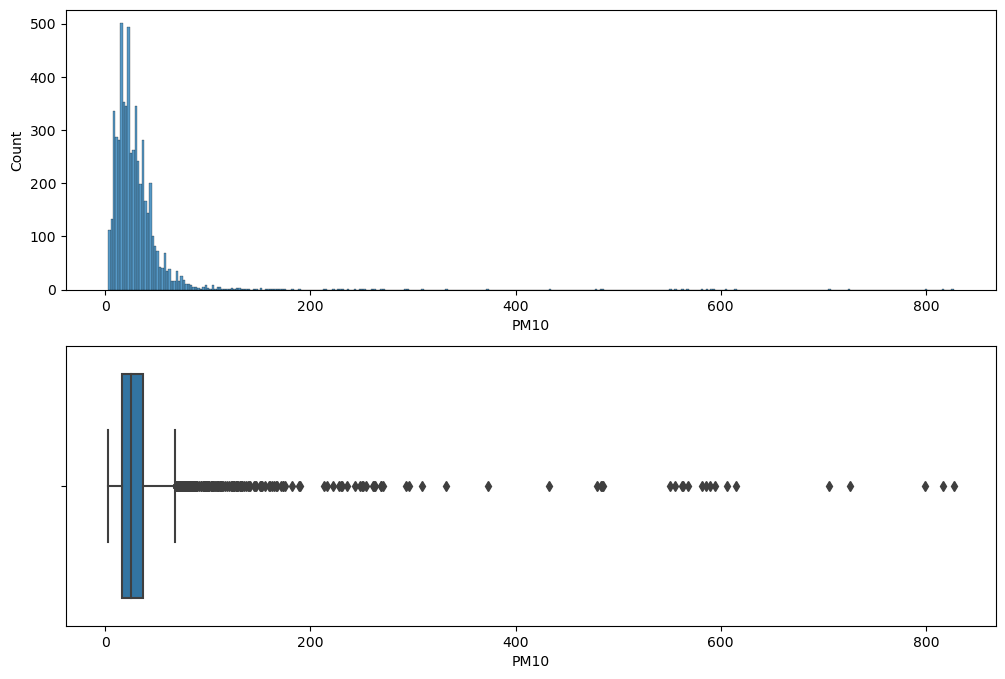

In [107]:
#변수의 분포를 확인해보세요.
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
sns.histplot(x = 'PM10', data = seoul_bike)

plt.subplot(2,1,2)
sns.boxplot(x = 'PM10', data = seoul_bike)

plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

 - 분포가 왼쪽으로 상당히 치우쳐져 있다.

7. 추가 분석사항 도출

In [108]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요
seoul_bike['PM10'].describe()

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

In [242]:
outlier = 37+21*1.5

temp = seoul_bike.loc[seoul_bike['PM10'] < outlier]

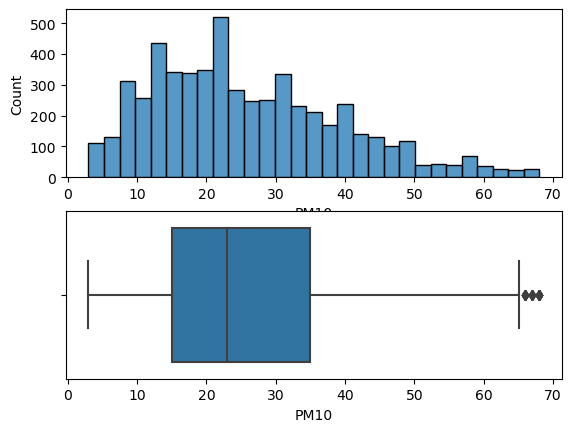

In [243]:
plt.subplot(2,1,1)
sns.histplot(x = 'PM10', data = temp)

plt.subplot(2,1,2)
sns.boxplot(x = 'PM10', data = temp)

plt.show()

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)

좋음(0~15)	보통(16~35)	나쁨(36~75)	매우 나쁨(76이상)

2. 변수가 수치형인지 범주형인지


In [119]:
#변수의 자료형을 확인해보세요.
seoul_bike['PM2.5'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5732 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

결측치 있다. 결측지 2으로 변경

4. 변수의 기초 통계량 확인

In [120]:
#변수의 기초 통계량을 확인해보세요
seoul_bike['PM2.5'].describe()

count    5732.000000
mean       15.666609
std        13.850990
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

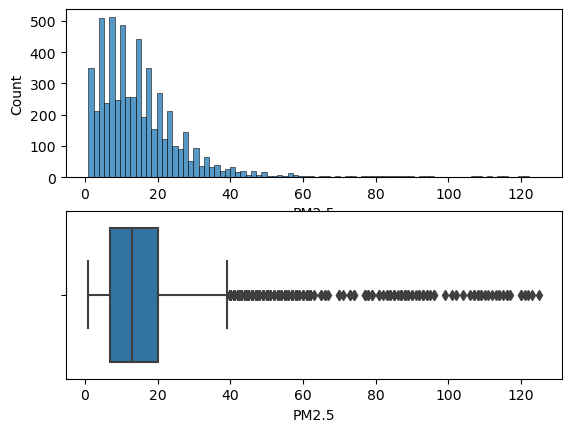

In [123]:
#변수의 분포를 확인해보세요.
plt.subplot(2,1,1)
sns.histplot(x = 'PM2.5', data = seoul_bike)

plt.subplot(2,1,2)
sns.boxplot(x = 'PM2.5', data = seoul_bike)

plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

미세먼지 농도(pm10) 와 비슷

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

각 날짜의 시간별 따릉이 대여량

2. 변수가 수치형인지 범주형인지


In [124]:
#변수의 자료형을 확인해보세요.
seoul_bike['count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: count
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

없다.

4. 변수의 기초 통계량 확인

In [125]:
#변수의 기초 통계량을 확인해보세요
seoul_bike['count'].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

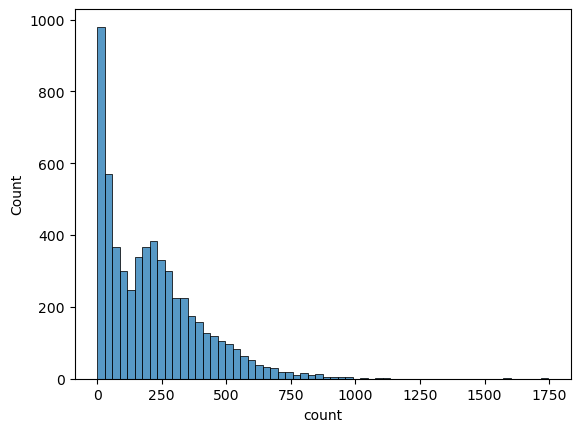

In [127]:
#변수의 분포를 확인해보세요.

sns.histplot(seoul_bike['count'])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

 시간별 대여량이 없는 경우가 많고 평균적으로 시간당 200여대의 따릉이가 대여된다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

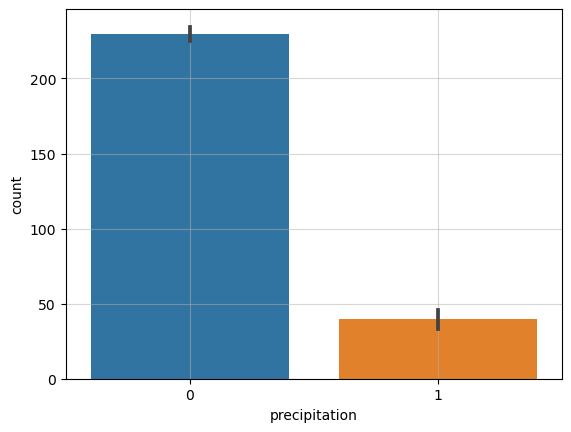

In [135]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

sns.barplot(x = 'precipitation', y = 'count', data = seoul_bike)
plt.grid(alpha = 0.5)
plt.show()

In [137]:
p0 = seoul_bike.loc[seoul_bike['precipitation'] == 0, 'count']
p1 = seoul_bike.loc[seoul_bike['precipitation'] == 1, 'count']

spst.ttest_ind(p0, p1)

Ttest_indResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98)

 - t 통계량이 매우 크고, pvalue값도 0.05 이므로 대립가설을 채택한다. 따라서 강우는 대여량에 영향이 있다고 할 수 있다.

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

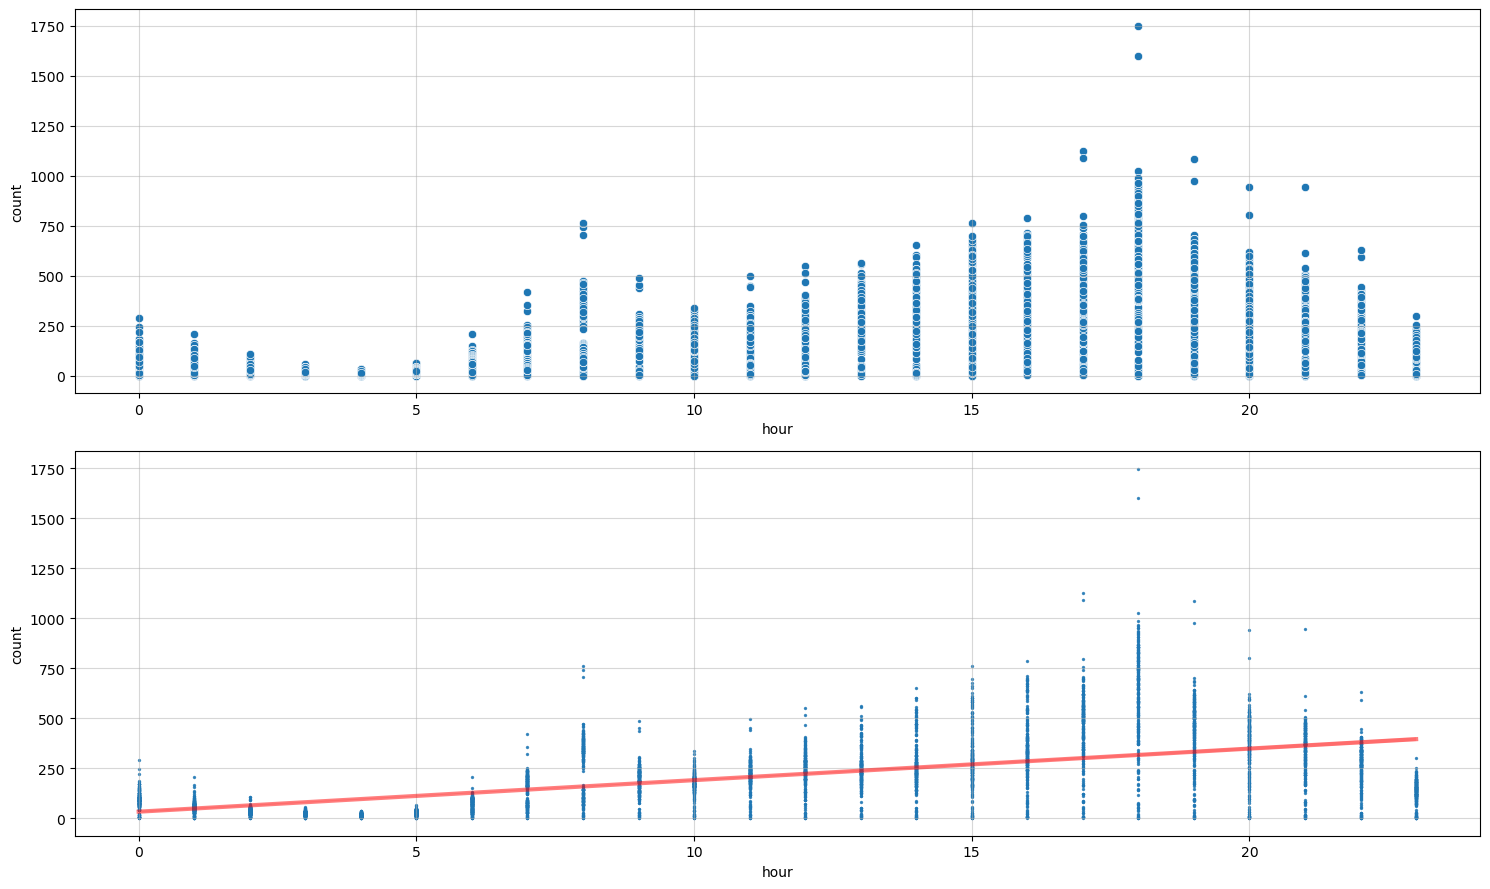

상관계수 :  0.5864350283919393
p-value :  0.0


In [241]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

# plt.figure(figsize = (8,6))
# sns.scatterplot(x = 'hour', y = 'count', data = seoul_bike)
# plt.grid(alpha = 0.5)
# plt.show()

var = 'hour'

scatter(var)

In [144]:
spst.pearsonr(seoul_bike['hour'], seoul_bike['count'])

PearsonRResult(statistic=0.5864350283919393, pvalue=0.0)

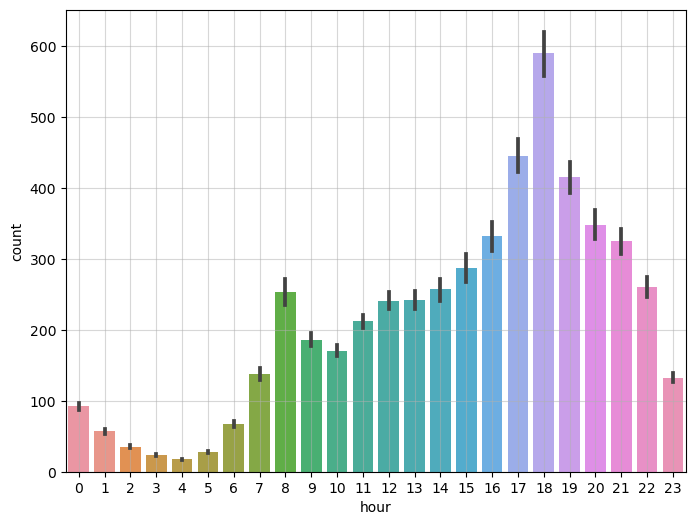

In [148]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'hour', y = 'count', data = seoul_bike)
plt.grid(alpha = 0.5)
plt.show()

In [233]:
h0 = seoul_bike.loc[seoul_bike['hour'] == 0, 'count']
h1 = seoul_bike.loc[seoul_bike['hour'] == 1, 'count']
h2 = seoul_bike.loc[seoul_bike['hour'] == 2, 'count']
h3 = seoul_bike.loc[seoul_bike['hour'] == 3, 'count']
h4 = seoul_bike.loc[seoul_bike['hour'] == 4, 'count']
h5 = seoul_bike.loc[seoul_bike['hour'] == 5, 'count']
h6 = seoul_bike.loc[seoul_bike['hour'] == 6, 'count']
h7 = seoul_bike.loc[seoul_bike['hour'] == 7, 'count']
h8 = seoul_bike.loc[seoul_bike['hour'] == 8, 'count']
h9 = seoul_bike.loc[seoul_bike['hour'] == 9, 'count']
h10 = seoul_bike.loc[seoul_bike['hour'] == 10, 'count']
h11 = seoul_bike.loc[seoul_bike['hour'] == 11, 'count']
h12 = seoul_bike.loc[seoul_bike['hour'] == 12, 'count']
h13 = seoul_bike.loc[seoul_bike['hour'] == 13, 'count']
h14 = seoul_bike.loc[seoul_bike['hour'] == 14, 'count']
h15 = seoul_bike.loc[seoul_bike['hour'] == 15, 'count']
h16 = seoul_bike.loc[seoul_bike['hour'] == 16, 'count']
h17 = seoul_bike.loc[seoul_bike['hour'] == 17, 'count']
h18 = seoul_bike.loc[seoul_bike['hour'] == 18, 'count']
h19 = seoul_bike.loc[seoul_bike['hour'] == 19, 'count']
h20 = seoul_bike.loc[seoul_bike['hour'] == 20, 'count']
h21 = seoul_bike.loc[seoul_bike['hour'] == 21, 'count']
h22 = seoul_bike.loc[seoul_bike['hour'] == 22, 'count']
h23 = seoul_bike.loc[seoul_bike['hour'] == 23, 'count']

spst.f_oneway(h0, h1, h2 ,h3 ,h4 ,h5 ,h6 ,h7, h8, h9, h10, h11, h12, h13, h14, h15, h16, h17, h18, h19, h20, h21, h22, h23)

F_onewayResult(statistic=401.6928835651985, pvalue=0.0)

In [204]:
def scatter(var):
    plt.figure(figsize = (15,9))

    plt.subplot(2,1,1)
    sns.scatterplot(x = var, y = 'count', data = seoul_bike)
    plt.grid(alpha = 0.5)

    plt.subplot(2,1,2)
    sns.regplot(x = var, y = 'count', data = seoul_bike, scatter_kws = {'s': 2}, line_kws = {'color' : 'r', 'alpha':0.5, 'lw' : 3} )
    plt.grid(alpha = 0.5)
    
    plt.tight_layout()
    plt.show()
    
    s = spst.pearsonr(seoul_bike[var], seoul_bike['count'])
    print('상관계수 : ',s[0])
    print('p-value : ',s[1])

3. 온도 데이터와 따릉이 대여량간 분석

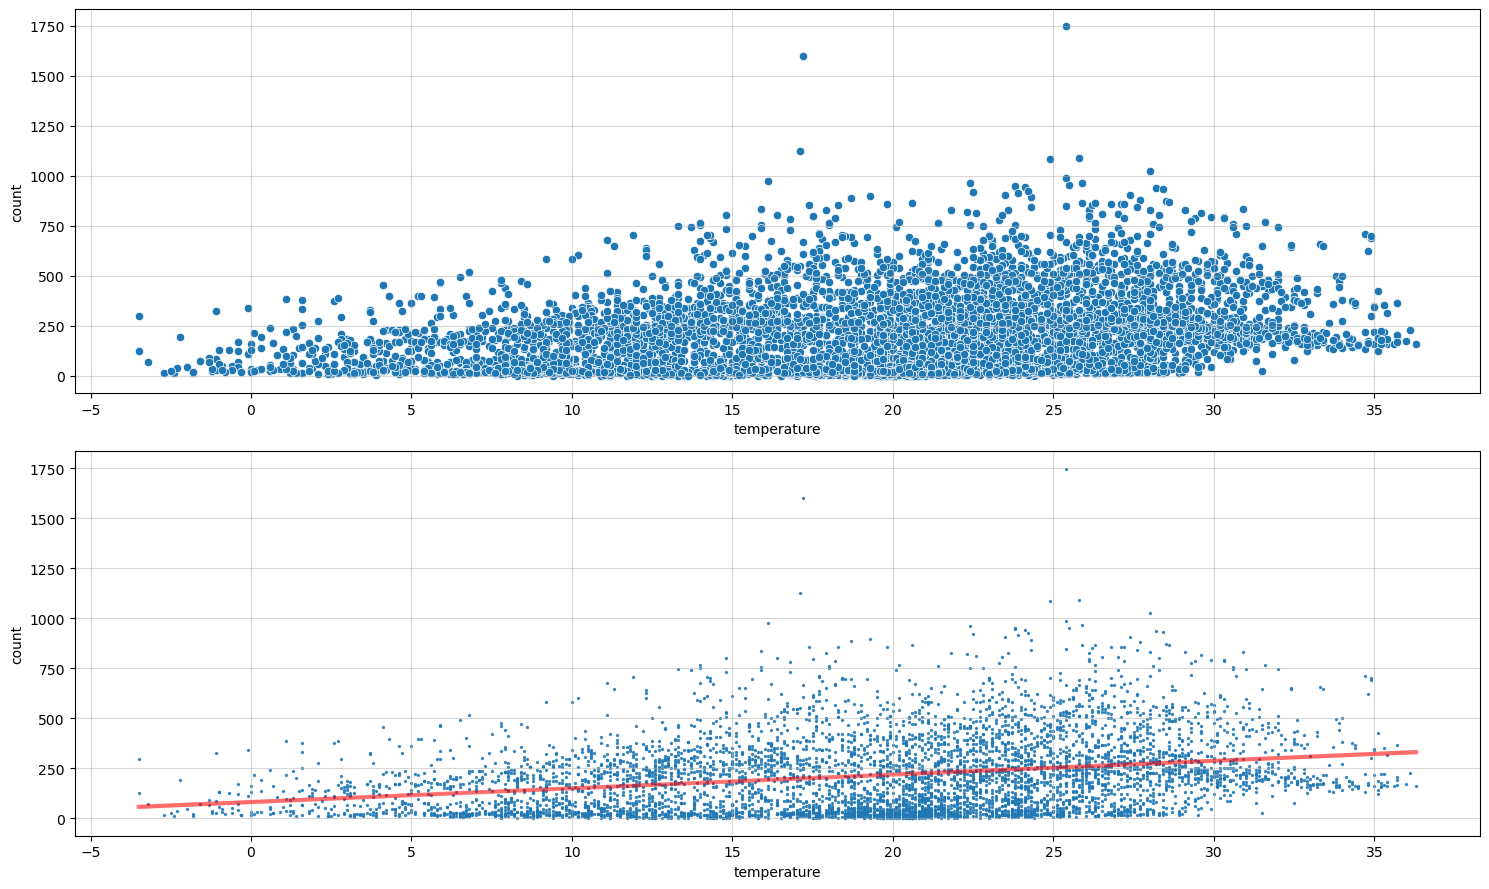

상관계수 :  0.2771692363089791
p-value :  2.940516555113978e-103


In [205]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

var = 'temperature'

scatter(var)




# plt.figure(figsize = (15,9))

# plt.subplot(2,1,1)
# sns.scatterplot(x = 'temperature', y = 'count', data = seoul_bike)
# plt.grid(alpha = 0.5)

# plt.subplot(2,1,2)
# #sns.regplot(x = 'temperature', y = 'count', data = seoul_bike, marker = '+')
# sns.regplot(x = 'temperature', y = 'count', data = seoul_bike, scatter_kws = {'s': 1}, line_kws = {'color' : 'r', 'alpha':0.5, 'lw' : 3} )
# plt.grid(alpha = 0.5)

# plt.tight_layout()
# plt.show()

온도가 대여량에 영향을 미친다고 할 만하지만 약한 상관관계를 가지고 있다.

4. 풍속 데이터와 따릉이 대여량간 분석

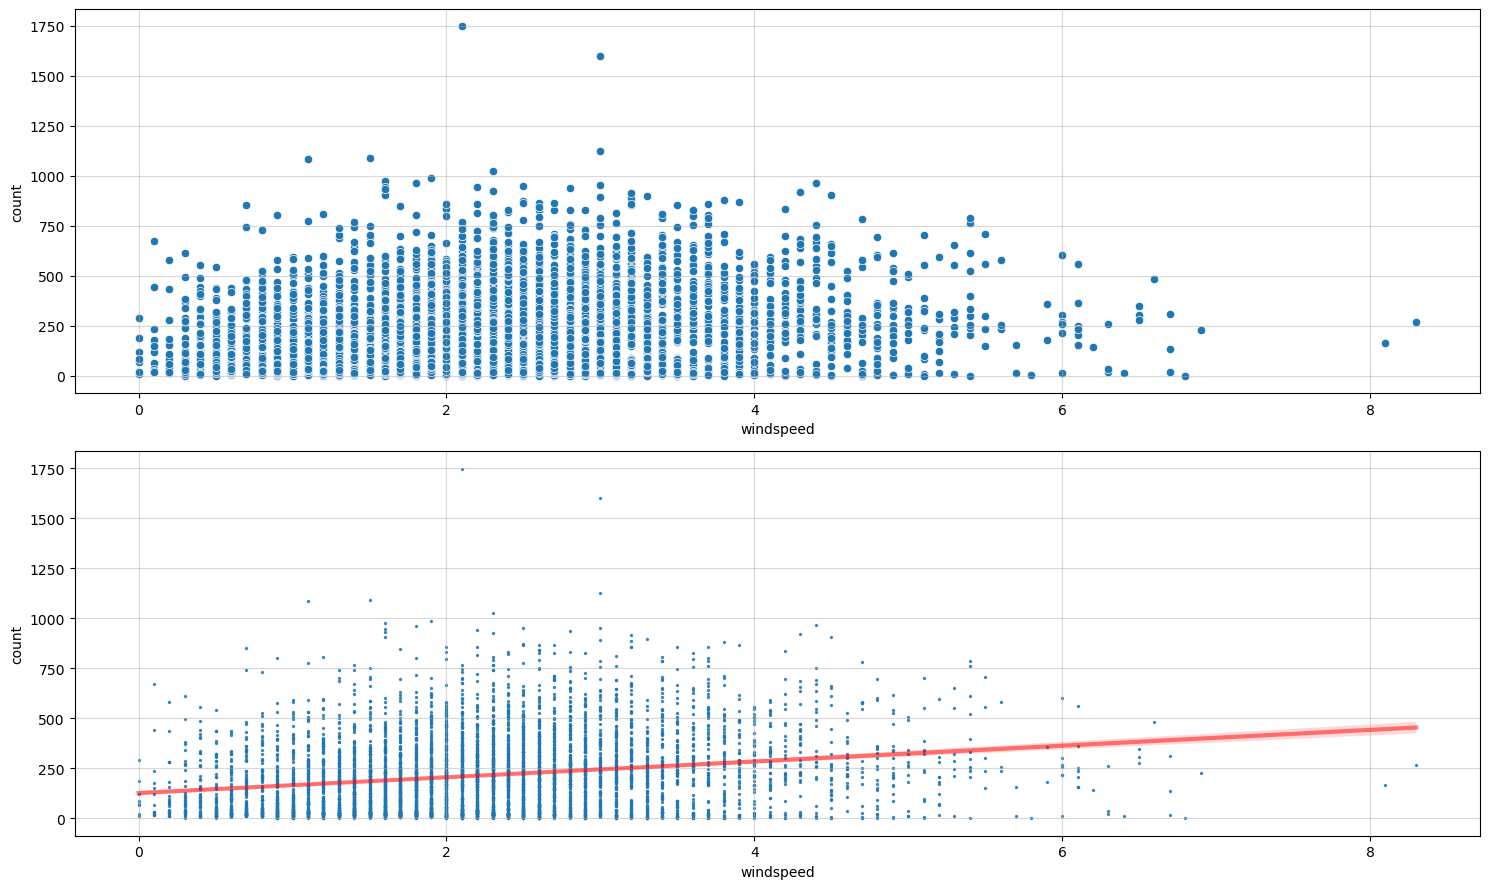

상관계수 :  0.22372189900674888
p-value :  5.243317678213925e-67


In [206]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
var = 'windspeed'

scatter(var)

약한 상관관계를 가지며 풍속이 어느정도 연관성이 잇다고 할 수 있다.

5. 습도 데이터와 따릉이 대여량간 분석

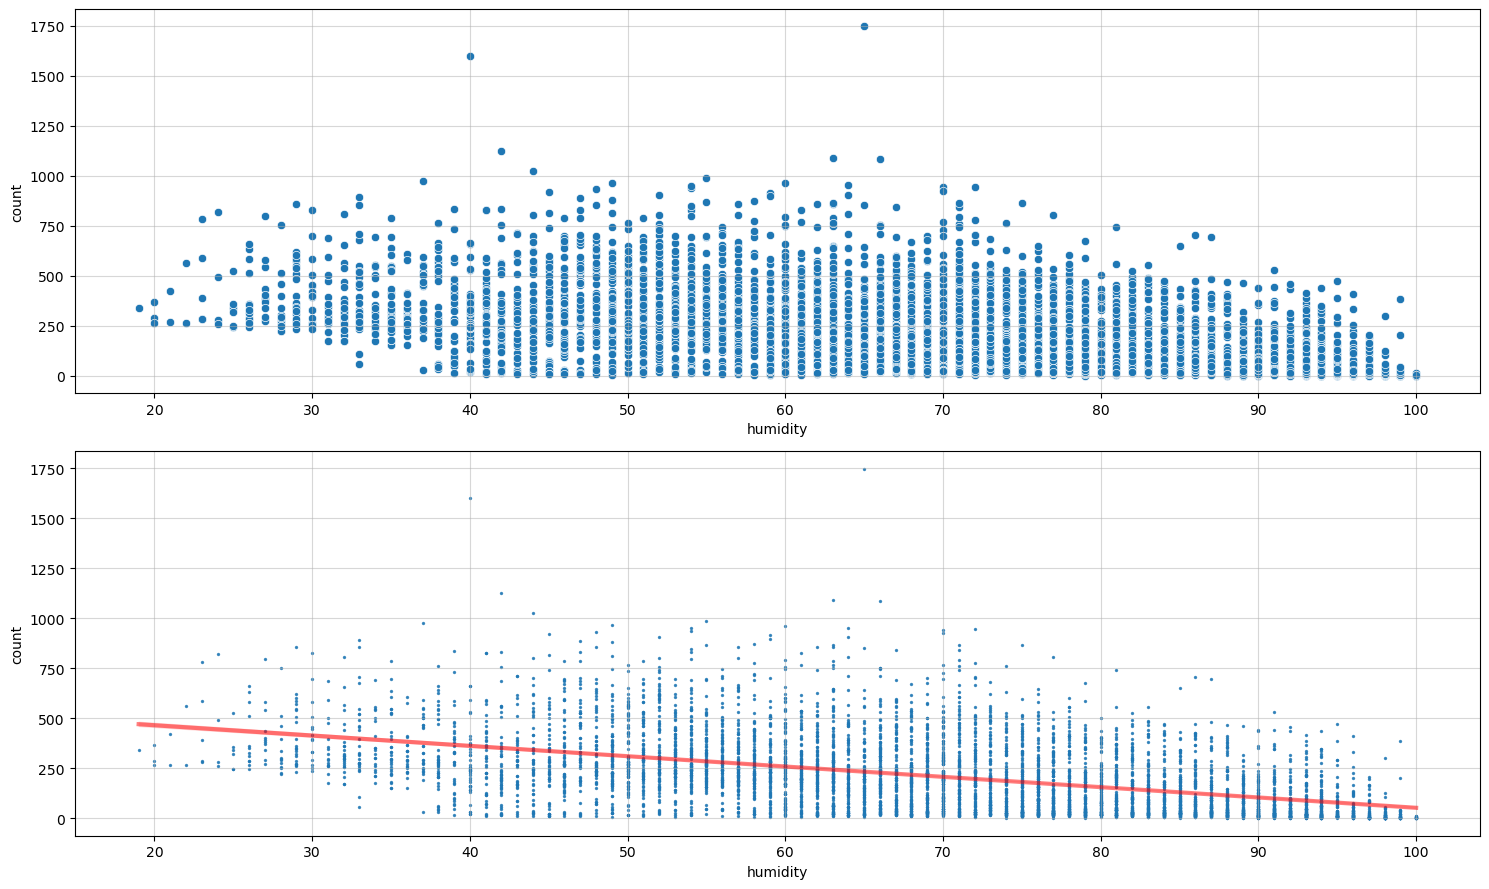

상관계수 :  -0.4789554265904137
p-value :  0.0


In [207]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
var = 'humidity'

scatter(var)

6. 시정 데이터와 따릉이 대여량간 분석

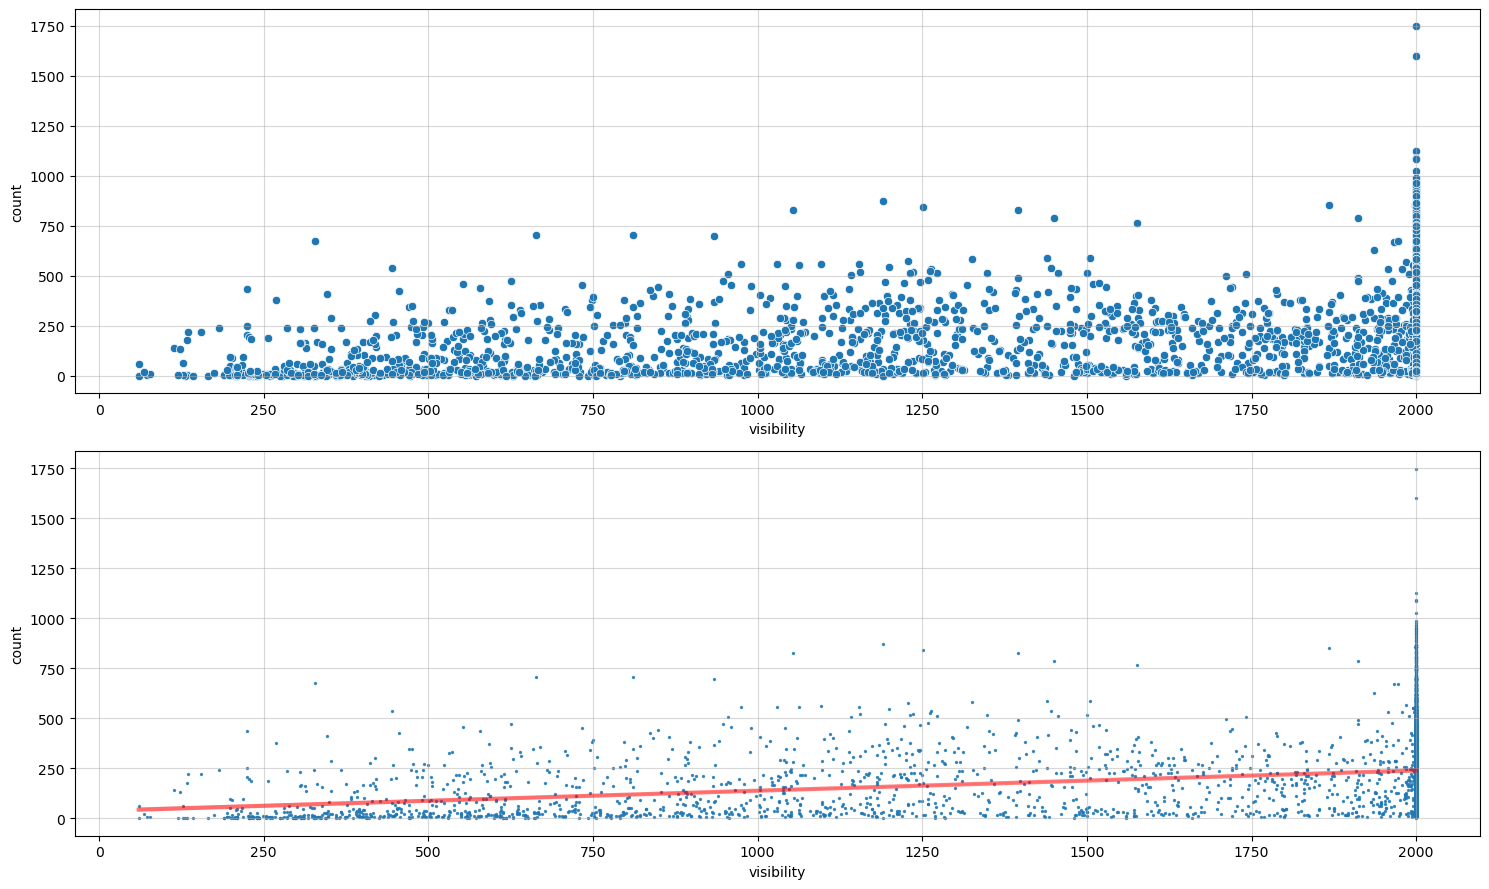

상관계수 :  0.26582778327488765
p-value :  7.87600385276935e-95


In [208]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

var = 'visibility'

scatter(var)

약한 상관관계를 가진다. 다만 시정 데이터가 2km가 주로 분포를 이루므로 이를 뺀 값을 다시 분석해볼 필요가 있다.

7. 오존 데이터와 따릉이 대여량간 분석

In [220]:
seoul_bike['ozone'] = seoul_bike['ozone'].fillna(0)

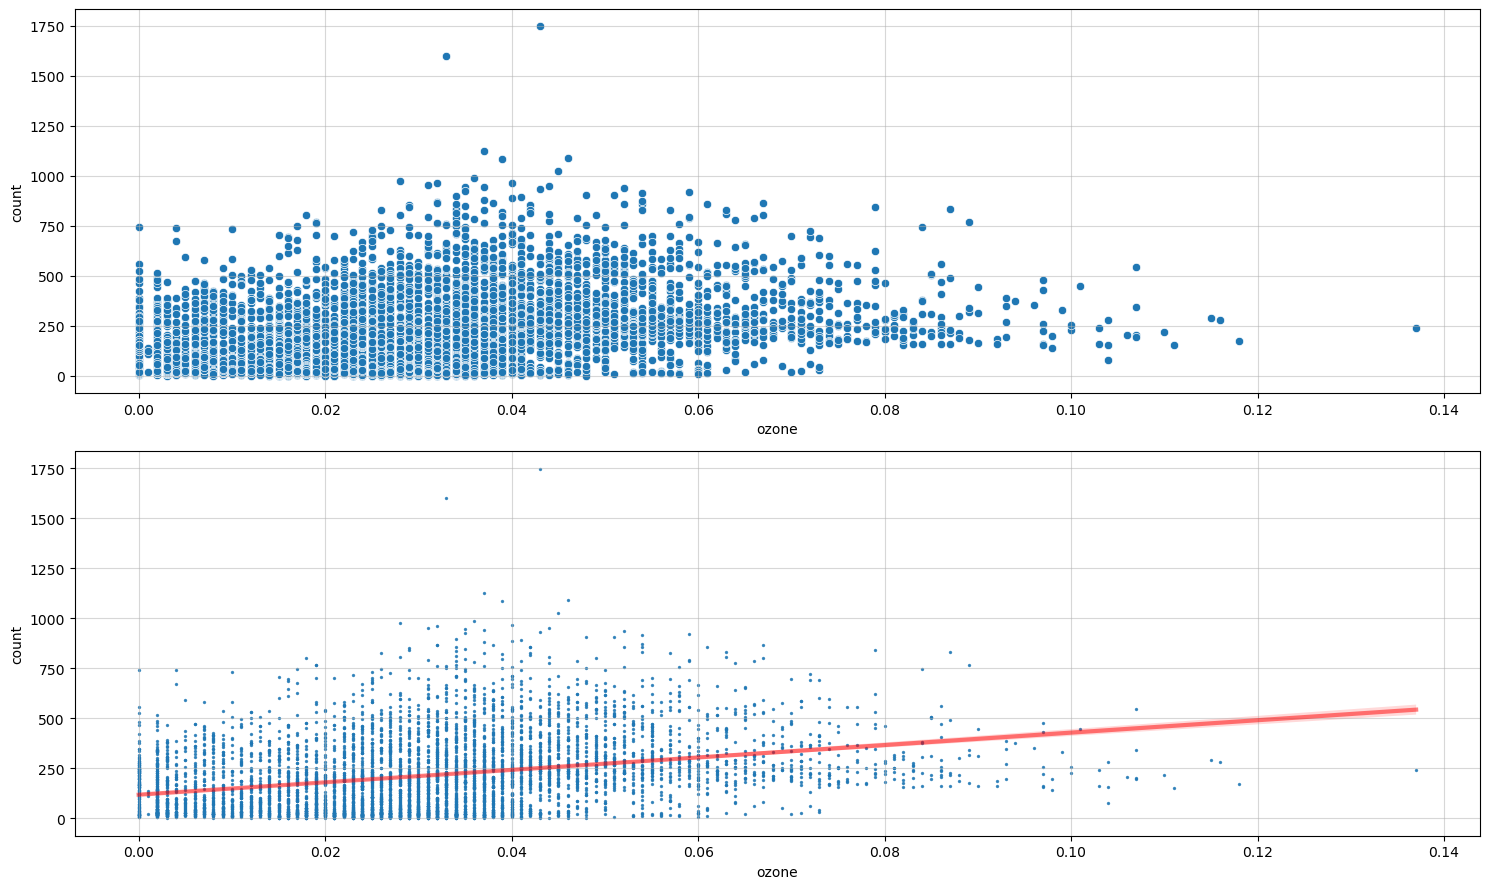

상관계수 :  0.3113394612139341
p-value :  3.6375080142829266e-131


In [221]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
#seoul_bike.loc[seoul_bike['ozone'].notnull() == False]
var = 'ozone'

scatter(var)

오존 농도와 연관이 있다고 할만하다.

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [16]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [225]:
seoul_bike['PM10'] = seoul_bike['PM10'].fillna(9)

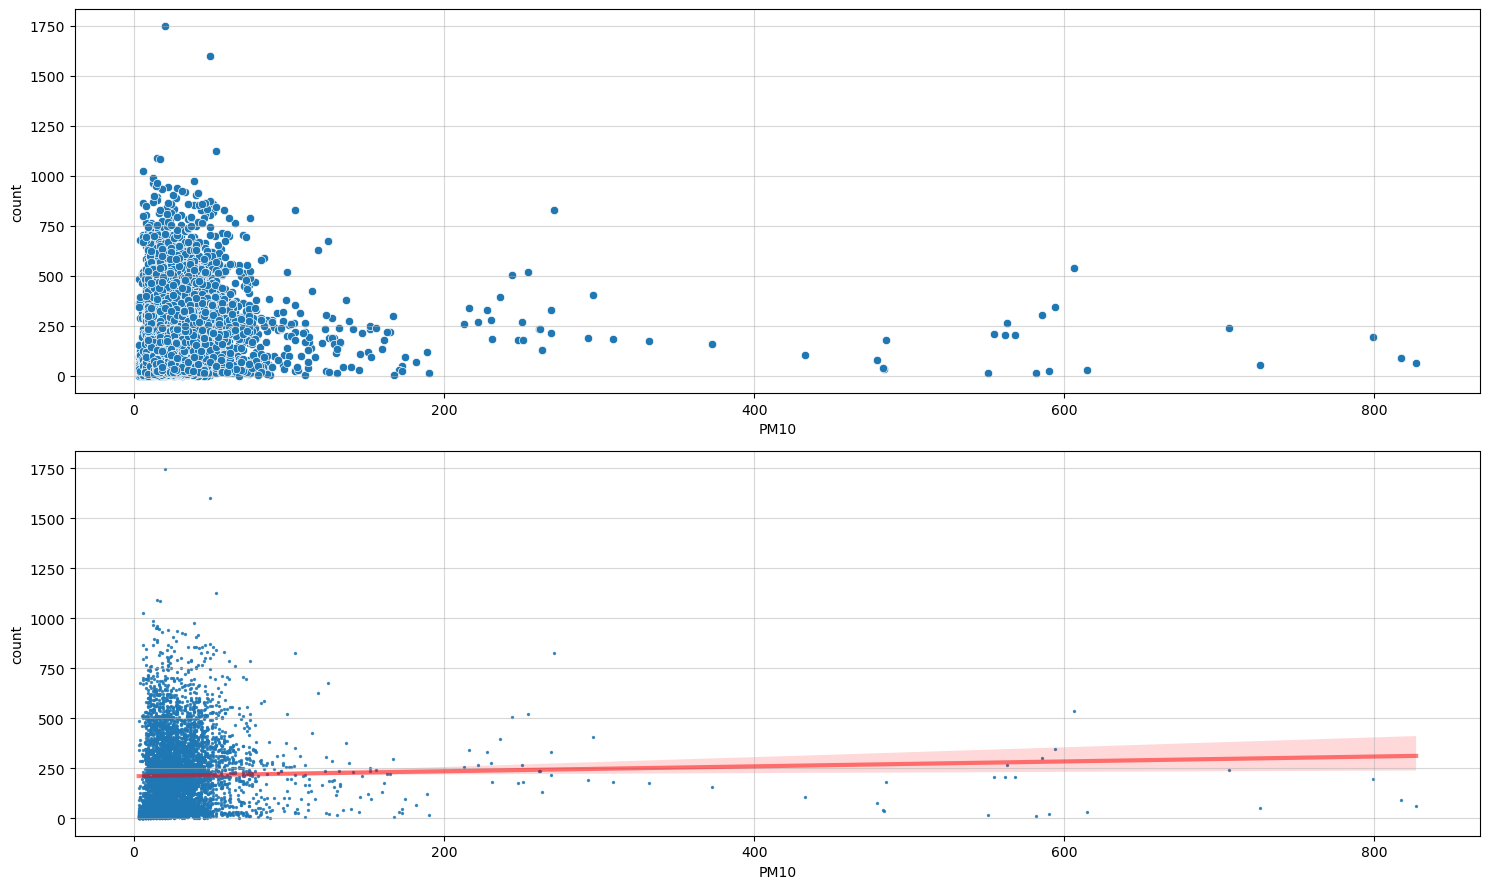

상관계수 :  0.028169953906810694
p-value :  0.031530476765277995


In [226]:
var = 'PM10'

scatter(var)

미세먼지 농도와 연관이 있다고 할만 하지만 약하다.

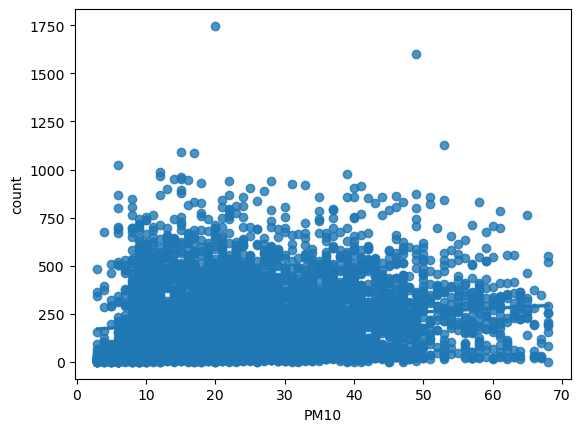

In [244]:
sns.regplot(x = temp['PM10'], y = temp['count'])
plt.show()

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [228]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
seoul_bike['PM2.5'] = seoul_bike['PM2.5'].fillna(2.0)

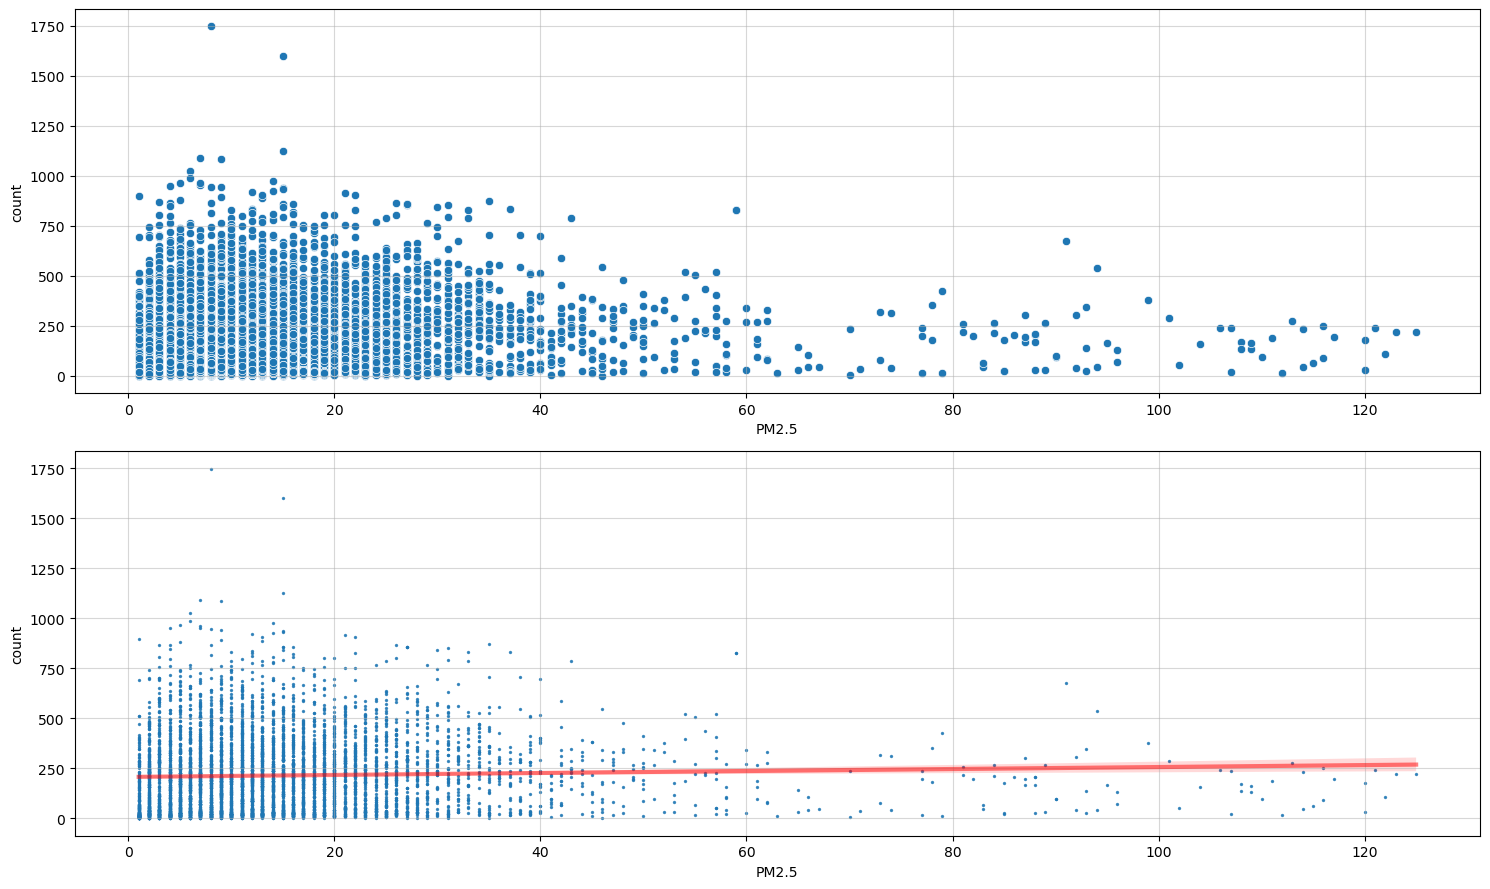

상관계수 :  0.03669475440072312
p-value :  0.005087686566457537


In [229]:
var = 'PM2.5'

scatter(var)

In [ ]:
초 미세먼지 농도와 연관이 있다고 할만 하지만 약하다.

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

시간, 강우 여부

#### <font color='green'>2. 약한 관계의 변수</font>


풍속, 온도, 시정, 습도, 오존

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


pm10, pm2.5

### [Step6] Insight 도출